(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

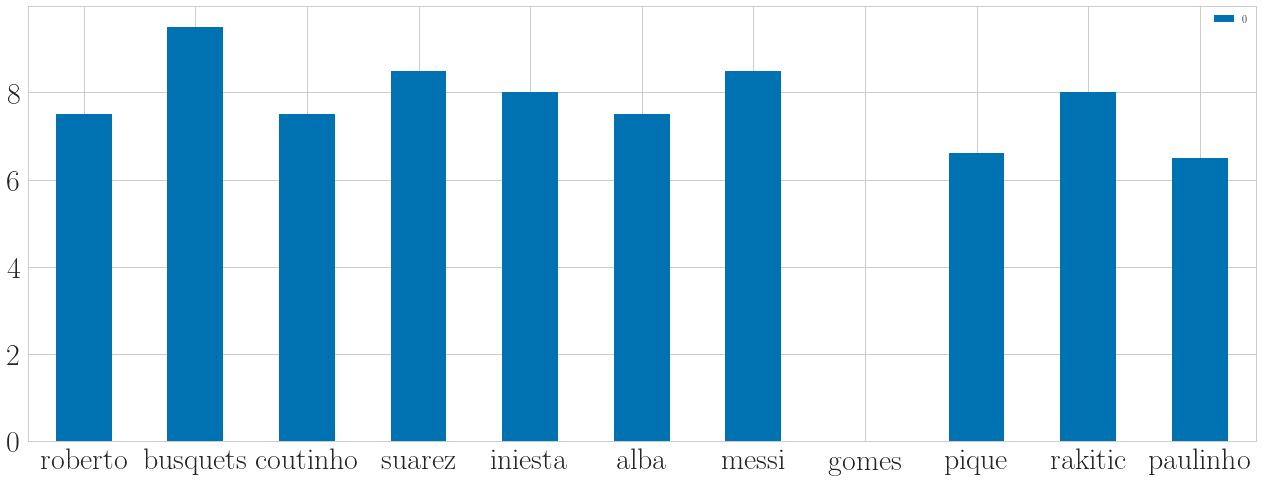

In [105]:
tab={}
tab['messi']=8.5
tab['suarez']=8.5
tab['iniesta']=8
tab['gomes']=0
tab['coutinho']=7.5
tab['paulinho']=6.5
tab['busquets']=9.5
tab['rakitic']=8
tab['alba']=7.5
tab['roberto']=7.5
tab['pique']=6.6
df=pd.DataFrame.from_dict(tab, orient='index')

ax=df.plot(kind='bar')
ax.figure.set_size_inches(22,8)
plt.xticks(rotation='0')


Text(-0.11,0.04,'gomes --')

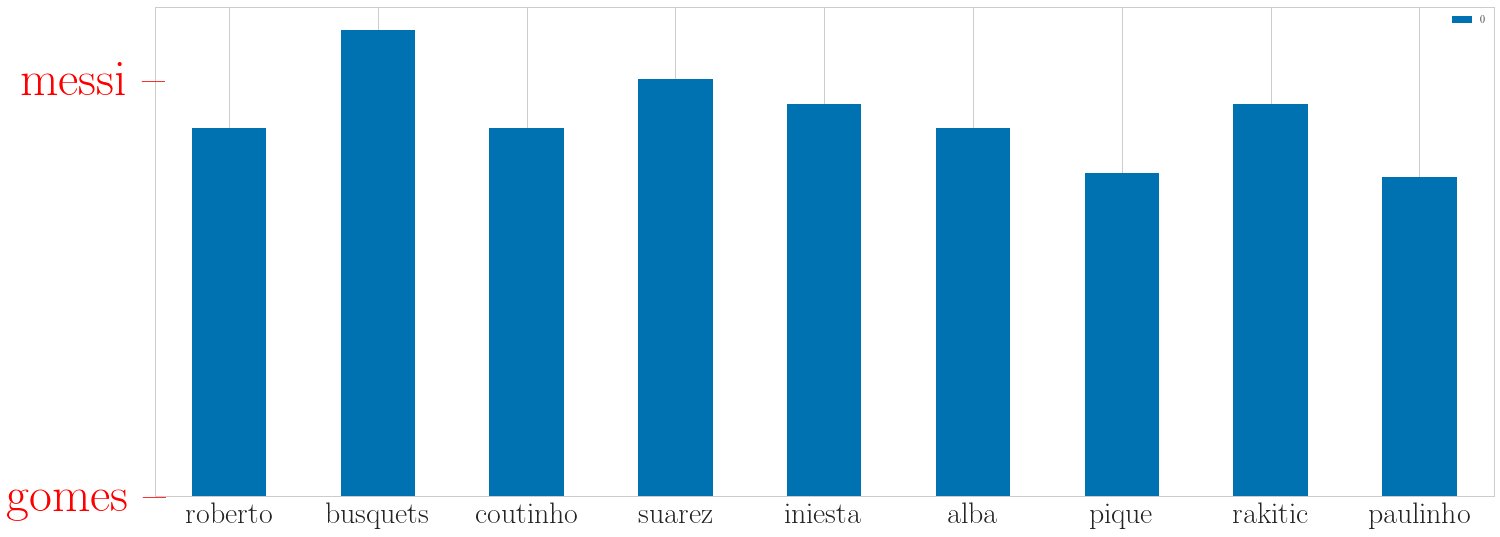

In [129]:
tab={}
tab['suarez']=8.5/8.5
tab['iniesta']=8/8.5
tab['coutinho']=7.5/8.5
tab['paulinho']=6.5/8.5
tab['busquets']=9.5/8.5
tab['rakitic']=8/8.5
tab['alba']=7.5/8.5
tab['roberto']=7.5/8.5
tab['pique']=6.6/8.5

df=pd.DataFrame.from_dict(tab, orient='index')

ax=df.plot(kind='bar')
ax.figure.set_size_inches(24,9)
plt.xticks(rotation='0')
plt.yticks([], [])

textstr="messi --"

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(-0.1, 0.89, textstr, transform=ax.transAxes, fontsize=50,
        verticalalignment='top', color='red')

textstr="gomes --"

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(-0.11, 0.04, textstr, transform=ax.transAxes, fontsize=50,
        verticalalignment='top', color='red')

In [131]:
#!/usr/bin/env python
import math

class Ellipse:
 def __init__(self, x,y, rx,ry):
  self.x  = x
  self.y  = y
  self.rx = rx
  self.ry = ry

class Matrix:
 def __init__(self, ellipse):
  self.half_width  = max(int(math.ceil(ellipse.rx + ellipse.x) + 1),
                         int(math.ceil(ellipse.ry + ellipse.y) + 1))
  self.half_height = self.half_width
  self.width       = self.half_width * 2
  self.height      = self.half_height * 2
  self.cells       = [[0 for x in range(self.width)] for y in range(self.height)]
 def display(self):
  codes = '0123456789abcdefghijklmnopqrstuvwxyz'
  print('\n'.join([''.join([codes[self.cells[y][x]] for x in range(self.width)])
                                                    for y in range(self.height)]))
 def draw_ellipse(self, i_bit, ellipse, angle):
  mask_bit  = (1 << i_bit)
  sin_angle = math.sin(math.radians(angle))
  cos_angle = math.cos(math.radians(angle))
  for matrix_y in range(self.height):
   for matrix_x in range(self.width):
    cell_x_unrotated = matrix_x - self.half_width
    cell_y_unrotated = matrix_y - self.half_height
    cell_x = sin_angle * cell_y_unrotated + cos_angle * cell_x_unrotated
    cell_y = cos_angle * cell_y_unrotated - sin_angle * cell_x_unrotated
    cell_dx = float(cell_x - ellipse.x) / ellipse.rx
    cell_dy = float(cell_y - ellipse.y) / ellipse.ry
    # print('%3d%3d | %4d%4d | %6.2f%6.2f | %6.2f %d' %
    #       (matrix_x,matrix_y, cell_x,cell_y, cell_dx,cell_dy,
    #        cell_dx * cell_dx + cell_dy * cell_dy,cell_dx * cell_dx + cell_dy * cell_dy > 1))
    if (cell_dx * cell_dx + cell_dy * cell_dy <= 1): self.cells[matrix_y][matrix_x] |= mask_bit
 def draw_ellipses(self, ellipse):
  for i_ellipse in range(5): self.draw_ellipse(i_ellipse, ellipse, i_ellipse * 72)
 def count_regions(self):
  counts = [0 for code in range(1 << 5)]
  for matrix_y in range(self.height):
   for matrix_x in range(self.width):
    counts[self.cells[matrix_y][matrix_x]] += 1
  area_all  = self.width * self.height
  area_min  = area_all
  area_non0 = area_all - counts[0]
  for i_count in range(len(counts)):
   if (area_min > counts[i_count]): area_min = counts[i_count]
  if (True):
   # if (area_min > 0):
    bar = ''.join(['%-5d+----' % i for i in range(99)]).replace(' ','-')[1:]
    ppm = 1e6 * area_min / area_non0
    #print('x:%2d y:%2d rx:%2d ry:%2d ppm:%4.0f %s' %
     #     (ellipse.x,ellipse.y, ellipse.rx,ellipse.ry, ppm, bar[:int(ppm / 100 + 0.5)]))
"""
ellipse = Ellipse(9,14, 40,80)
ellipse = Ellipse(7,16, 42,78)
ellipse = Ellipse(5,12, 46,70)
ellipse = Ellipse(5,14, 37,64)
ellipse = Ellipse(5,12, 40,65)
ellipse = Ellipse(5,12, 41,66)
ellipse = Ellipse(10,24, 82,132)
matrix  = Matrix(ellipse)
matrix.draw_ellipses(ellipse)
matrix.display()
matrix.count_regions()
"""
model_x  =  20; half_range_x  = 1; step_x  = 1
model_y  =  46; half_range_y  = 1; step_y  = 1
model_rx = 166; half_range_rx = 1; step_rx = 1
model_ry = 264; half_range_ry = 1; step_ry = 1
for    x  in range(-half_range_x , half_range_x  + 1, step_x ):
 for   y  in range(-half_range_y , half_range_y  + 1, step_y ):
  for  rx in range(-half_range_rx, half_range_rx + 1, step_rx):
   for ry in range(-half_range_ry, half_range_ry + 1, step_ry):
    ellipse = Ellipse(model_x + x,model_y + y, model_rx + rx,model_ry + ry)
    matrix  = Matrix(ellipse)
    matrix.draw_ellipses(ellipse)
    matrix.count_regions()
# """

# Prepare data --> SKIP

In [5]:
# # read data
# dependencies=pd.read_csv('../icsr2018/npm-dependencies-nov.csv',
#                                 sep=',', dtype=object, index_col=None)
# versions=pd.read_csv('../icsr2018/npm-versions-nov.csv',
#                                 sep=',', dtype=object, index_col=None)
# # get only npm packages
# # dependencies=dependencies.query('Platform=="NPM"')
# # versions=versions.query('Platform=="NPM"')
# # print(len(dependencies),len(versions))

# #get only important columns
# # dependencies=dependencies.loc[:,['Project Name','Version Number','Dependency Name','Dependency Kind','Dependency Requirements']]
# # versions=versions.loc[:,['Project Name','Number','Published Timestamp']]

# # create and id
# versions['id']=versions['Project name']+';'+versions['Version number']
# dependencies['id']=dependencies['Project name']+';'+dependencies['Version number']

# # get only id and date
# versions=versions.loc[:,['id','Version date']]

# # merge 
# dev_dep=pd.merge(dependencies,versions, on='id', how='outer')
# dev_dep.dropna(inplace=True)
# #dev_dep['Published Package']=dev_dep['Published Timestamp'].apply(lambda x: str(x).split()[0])
# dev_dep.drop(['id'], axis=1, inplace=True)
# dev_dep.rename(columns = {'Project name':'package','Version number':'package_version',
#                           'Dependency name':'dependency','Dependency requirements':'dependency_requirements',
#                          'Dependency kind':'dependency_kind','Version date':'version_date'}, inplace=True)
# dev_dep=dev_dep[['dependency','package','package_version','dependency_requirements','dependency_kind','version_date']]
# dev_dep.sort_values(['dependency'],ascending=False, inplace=True)
# len(dev_dep)

# #SAVE DATA
# #dev_dep.to_csv('../icsr2018/dependencies_versions_15June17.csv', index=False)

46948071

# LOAD DATA --> Skip

In [28]:
# dep_ver['Dots_in_Req']=dep_ver['dependency_constraint'].apply(lambda x: len(str(x).split('.'))-1)
# dep_ver['Space_in_Req']=dep_ver['Dependency Requirements'].apply(lambda x: len(str(x).split())-1)
# dep_ver['git']=dep_ver['Dependency Requirements'].apply(lambda x: 'git' in str(x))
# dep_ver['or1']=dep_ver['Dependency Requirements'].apply(lambda x: '|' in str(x))
# dep_ver['or2']=dep_ver['Dependency Requirements'].apply(lambda x: 'or' in str(x))
# dep_ver['and1']=dep_ver['Dependency Requirements'].apply(lambda x: '&' in str(x))
# dep_ver['and2']=dep_ver['Dependency Requirements'].apply(lambda x: 'and' in str(x))
# dep_ver['dieze']=dep_ver['Dependency Requirements'].apply(lambda x: '#' in str(x))
# dep_ver['tilde']=dep_ver['Dependency Requirements'].apply(lambda x: '~' in str(x))
# dep_ver['caret']=dep_ver['Dependency Requirements'].apply(lambda x: '^' in str(x))
# dep_ver['greater']=dep_ver['Dependency Requirements'].apply(lambda x: '>' in str(x))
# dep_ver['greaterEqual']=dep_ver['Dependency Requirements'].apply(lambda x: '>=' in str(x))
# dep_ver['lesser']=dep_ver['Dependency Requirements'].apply(lambda x: '<' in str(x))
# dep_ver['lesserEqual']=dep_ver['Dependency Requirements'].apply(lambda x: '<=' in str(x))
# dep_ver['equal']=dep_ver['Dependency Requirements'].apply(lambda x: '=' in str(x))
# dep_ver['latest']=dep_ver['Dependency Requirements'].apply(lambda x: 'latest' in str(x))
# dep_ver['file']=dep_ver['Dependency Requirements'].apply(lambda x: 'file:' in str(x))
# dep_ver['slash']=dep_ver['Dependency Requirements'].apply(lambda x: '/' in str(x))
# dep_ver['alpha']=dep_ver['Dependency Requirements'].apply(lambda x: 'alpha' in str(x))
# dep_ver['beta']=dep_ver['Dependency Requirements'].apply(lambda x: 'beta' in str(x))

# # easy_ones=dep_ver.query('Dots_in_Req==2 and Space_in_Req==0 and git==False and or1==False and or2==False and and1==False and and2==False and file==False and slash==False and dieze==False')

In [3]:
versions_orig=pd.read_csv('../icsr2018/csv/NPM-versions.csv', sep=',', dtype=object, index_col=None,  error_bad_lines=False)

In [14]:
versions=pd.read_csv('../icsr2018/csv/graph_version.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)

In [7]:
versions_orig.query('package=="react"').sort_values(['date'], ascending=False)

,package,version,date
748607,react,16.0.0,2017-09-26 16:00:29 UTC
748606,react,15.6.2,2017-09-26 00:10:25 UTC
748629,react,16.0.0-rc.3,2017-09-14 13:09:33 UTC
748628,react,16.0.0-rc.2,2017-09-07 03:36:42 UTC
748627,react,16.0.0-rc.1,2017-09-06 23:11:31 UTC
748626,react,16.0.0-beta.5,2017-08-08 17:27:27 UTC
748625,react,16.0.0-beta.4,2017-08-08 16:09:42 UTC
748624,react,16.0.0-beta.3,2017-08-03 23:07:32 UTC
748623,react,16.0.0-beta.2,2017-07-27 17:06:49 UTC
748622,react,16.0.0-beta.1,2017-07-26 20:03:38 UTC


# Begin Analysis : final_depends_exact_15-11.csv

In [85]:
dep_ver=pd.read_csv('../icsr2018/csv/final_depends_exact_15-11.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)
#deps_time_caret0['dieze']=deps_time_caret0['dieze'].apply(lambda ver: (ver.split('#')[1].split('.')[0]+'.'+ver.split('#')[1].split('.')[1]) in (ver.split('#')[0].split('.')[0]+'.'+ver.split('#')[0].split('.')[1])) 

In [89]:
dep_ver=pd.read_csv('../icsr2018/csv/final_depends_exact_15-11.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)
dependencies=dep_ver.groupby('dependency').count()

In [23]:
dep_ver['type']='other'
dep_ver['type']=dep_ver['dependency_constraint'].apply(lambda x: 
                                                       'caret' if str(x).replace(' ','').startswith('^') 
                                                       else 'tilde' if str(x).replace(' ','').startswith('~')
                                                      else 'latest' if str(x).replace(' ','').lower()=='x' 
                                                       else 'latest' if str(x).replace(' ','')=='*' 
                                                       else 'latest' if str(x).replace(' ','')=='latest' 
                                                       else 'latest' if str(x).replace(' ','').lower()=='x.x.x' 
                                                       else 'latest' if str(x).replace(' ','')=='*.*.*'
                                                       else 'strict' if len(str(x).split('.'))==3 and str(x).split('.')[0].replace('v','').replace(' ','').replace('=','').isdigit() and str(x).split('.')[1].isdigit() and str(x).split('.')[2].isdigit() 
                                                      else 'other')
#dep_ver['dependency_date']=dep_ver['dependency_date'].apply(lambda x: str(x).split()[0])
#dep_ver['latest_dependency_release']=dep_ver['latest_dependency_release'].apply(lambda x: str(x).split()[0])

In [24]:
dep_ver=dep_ver.query('dependency_kind=="Development" or dependency_kind=="runtime"')
dep_ver['dependency_kind']=dep_ver['dependency_kind'].apply(lambda x: x.capitalize())

In [34]:
a=dep_ver
a=a.groupby(['type','dependency_kind']).count().reset_index()
a['kind']=a['dependency_kind']
a.sort_values(['dependency'], ascending=False, inplace=True)
a['package']=a['dependency'].apply(lambda x: float(x)*100/float(len(dep_ver)))

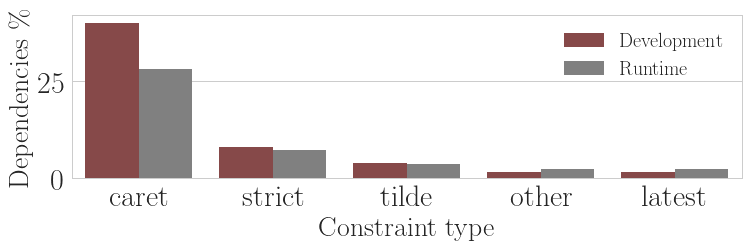

In [36]:
ax = sns.barplot(x="type", y="package", hue="kind", data=a, palette=['brown','gray','green'], saturation=0.5 )
ax.figure.set_size_inches(12,3)
ax.set_xlabel('Constraint type')
ax.set_ylabel('Dependencies \%')
#ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=18,ncol=3)#, fancybox=True, shadow=True)
ax.legend( loc='upper right', bbox_to_anchor=(1, 1), fontsize=20)#,ncol=3)#, fancybox=True, shadow=True)
ax.figure.savefig('../../seneca_research/ICSR2018/figures/tilde_caret.pdf', bbox_inches='tight', facecolor='white')

In [9]:
# not to be considered 
dep_ver2=dep_ver.query('dependency_version!="False" and dependency_date!="l" and latest_dependency_release>=dependency_date')
a=len(dep_ver2)
float(a)/len(dep_ver)

0.9834289099044169

# Outdated_deps-20-11.csv 

In [16]:
dev_per_outdated=pd.read_csv('../icsr2018/csv/outdated_deps-20-11.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)

dev_per_outdated['dependency_date']=dev_per_outdated['dependency_date'].apply(lambda x: str(x).split()[0])
dev_per_outdated['latest_dependency_release']=dev_per_outdated['latest_dependency_release'].apply(lambda x: str(x).split()[0])

dev_per_outdated['dependency_date']=pd.to_datetime(dev_per_outdated['dependency_date'])
dev_per_outdated['latest_dependency_release']=pd.to_datetime(dev_per_outdated['latest_dependency_release'])
dev_per_outdated['time']=dev_per_outdated['latest_dependency_release']- dev_per_outdated['dependency_date']
dev_per_outdated['dependency_kind']=dev_per_outdated['dependency_kind'].apply(lambda x: x.capitalize())
dev_per_outdated=dev_per_outdated.query('dependency_kind=="Development" or dependency_kind=="Runtime"')
len(dev_per_outdated)

11903544

In [18]:
print(len(dev_per_outdated.groupby('package'))/len(dep_ver2.groupby('package')), len(dev_per_outdated)/len(dep_ver2))

0.600529229646197 0.26990273417870997


In [21]:
dev_per_outdated_eslint=dev_per_outdated.query('package=="eslint"')
dev_per_outdated_eslint['date']=dev_per_outdated_eslint['version_date'].apply(lambda x: str(x).split()[0].split('-')[0])
outdated_time=dev_per_outdated_eslint.loc[:,['time','date']]
outdated_time['time']=outdated_time['time'].apply(lambda x: int(str(x).split()[0]))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
outdated_time.query('date=="2017"').time.describe().apply(lambda x: format(x, 'f'))

count    295.000000
mean     234.603390
std      220.307520
min        0.000000
25%       41.000000
50%      172.000000
75%      372.000000
max      968.000000
Name: time, dtype: object

In [28]:
len(dev_per_outdated)

7841745

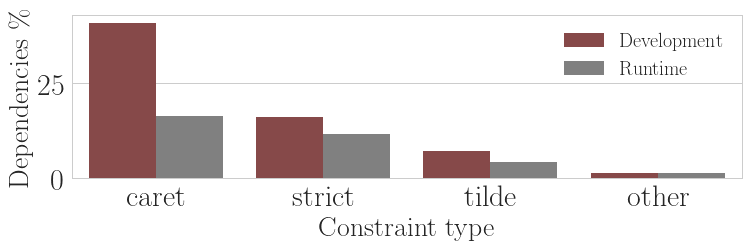

In [33]:
a=dev_per_outdated
a=a.groupby(['type','dependency_kind']).count().reset_index()
a['kind']=a['dependency_kind']
a.sort_values(['dependency'], ascending=False, inplace=True)
a['package']=a['dependency'].apply(lambda x: float(x)*100/float(11903591))
ax = sns.barplot(x="type", y="package", hue="kind", data=a, palette=['brown','gray','green'], saturation=0.5 )
ax.figure.set_size_inches(12,3)
ax.set_xlabel('Constraint type')
ax.set_ylabel('Dependencies \%')
ax.legend( loc='upper right', bbox_to_anchor=(1, 1), fontsize=20)#,ncol=3)#, fancybox=True, shadow=True)
ax.figure.savefig('../../seneca_research/ICSR2018/figures/tilde_caret_outdated.pdf', bbox_inches='tight', facecolor='white')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


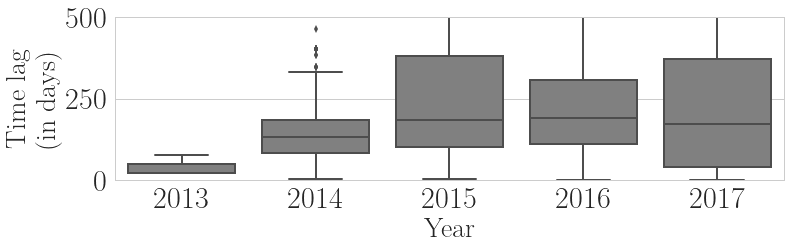

In [5]:
dev_per_outdated_eslint=dev_per_outdated.query('package=="eslint"')
dev_per_outdated_eslint['date']=dev_per_outdated_eslint['version_date'].apply(lambda x: str(x).split()[0].split('-')[0])
outdated_time=dev_per_outdated_eslint.loc[:,['time','date']]
outdated_time['time']=outdated_time['time'].apply(lambda x: int(str(x).split()[0]))

#start ploting
ax = sns.boxplot(y="time", x='date', color='gray', data=outdated_time, order=['2013','2014','2015','2016','2017'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Time lag \n (in days)')
ax.set_xlabel('Year')
#ax.set_yscale('log')
ax.figure.set_size_inches(12,3)
ax.set_ylim(0,500)
ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=18,ncol=3, fancybox=True, shadow=True)
ax.figure.savefig('../../seneca_research/ICSR2018/figures/tLag_eslint.png', bbox_inches='tight', facecolor='white')

In [19]:
outdated_time=dev_per_outdated.loc[:,['time','version_date']]
outdated_time['date']=outdated_time['version_date'].apply(lambda x: str(x).split()[0].split('-')[0])
outdated_time['time']=outdated_time['time'].apply(lambda x: int(str(x).split()[0]))

In [71]:
outdated_time.query('date=="2017"').time.describe().apply(lambda x: format(x, 'f'))

count    6521519.000000
mean         173.897039
std          206.582905
min            0.000000
25%           36.000000
50%          100.000000
75%          243.000000
max         2358.000000
Name: time, dtype: object

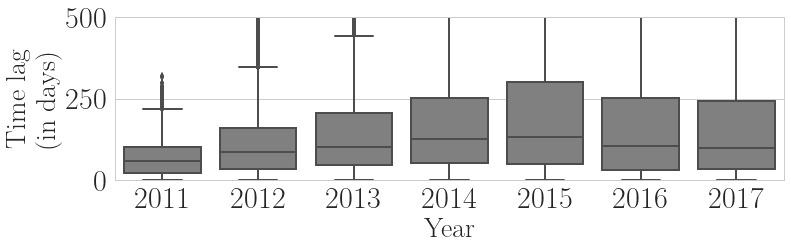

In [21]:
ax = sns.boxplot(y="time", x='date', color='gray', data=outdated_time, order=['2011','2012','2013','2014','2015','2016','2017'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Time lag \n (in days)')
ax.set_xlabel('Year')
#ax.set_yscale('log')
ax.figure.set_size_inches(12,3)
ax.set_ylim(0,500)
ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=18,ncol=3, fancybox=True, shadow=True)
ax.figure.savefig('../../seneca_research/ICSR2018/figures/dep_tlag.pdf', bbox_inches='tight', facecolor='white')

# Begin Analysis : tech_lag_updates-16-11.csv

In [2]:
tech_lag_calcul=pd.read_csv('../icsr2018/csv/tech_lag_updates-16-11.csv', sep=';', dtype=object, index_col=None)
len(tech_lag_calcul)
tech_lag_calcul['release_type']=tech_lag_calcul['major_release']+';'+tech_lag_calcul['minor_release']+';'+tech_lag_calcul['patch_release']

tech_lag_calcul['release_type']=tech_lag_calcul['release_type'].apply(lambda x: 'Major release' if str(x).split(';')[0]!="False"
                                                     else 'Minor release' if str(x).split(';')[1]!="False"
                                                     else 'Patch release' if str(x).split(';')[2]!="False"
                                                     else 'First release')
tech_lag_calcul['release_type']=tech_lag_calcul['release_type'].apply(lambda x: x.capitalize())

In [3]:
tech_lag_calcul['updates']=tech_lag_calcul['updates'].apply(int)
tech_lag_calcul['updates_inverse']=tech_lag_calcul['updates_inverse'].apply(int)

In [4]:
tech_lag_calcul['updates_cumsum']=tech_lag_calcul['updates'].cumsum()
tech_lag_calcul['updates_inverse_cumsum']=tech_lag_calcul['updates_inverse'].cumsum()

In [91]:
# only required ones
temp=pd.read_csv('../icsr2018/csv/final_depends_exact_15-11.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)
dependencies=temp.groupby('dependency').count()
dependencies=dependencies.reset_index()
dependencies=dependencies.loc[:,['dependency','version_date']]
dependencies=dependencies.rename(columns = {'dependency':'package','version_date':'exist'})
dependencies['exist']=1
dep=tech_lag_calcul.set_index('package').merge(dependencies.set_index('package'), left_index=True, right_index=True)
dep=dep.reset_index()

In [ ]:
dep_ver=dep_ver.sort_values(['version_date'], ascending=True)

#groupby(['dependency','version_date']).count()

In [135]:
dep_ver=dep_ver.query('version_date>"2009"')
dep_ver.head()

,package,package_version,version_date,dependency,dependency_constraint,dependency_kind,dependency_version,dependency_date,latest_dependency_release
16571640,express-session-mongo,0.0.1,2010-11-15 00:00:00 UTC,connect,>=0.2.4,runtime,False,False,False
16571641,express-session-mongo,0.0.1,2010-11-15 00:00:00 UTC,mongodb,>=0.7.9,runtime,False,False,False
16571645,express-session-mongo,0.0.1,2010-11-15 00:00:00 UTC,express,>=1.0.0rc4,runtime,False,False,False
27880387,nack,0.2.0,2010-12-18 20:17:11 UTC,connect,>= 0.1.0,runtime,False,False,False
27880306,nack,0.1.15,2010-12-18 20:17:11 UTC,connect,>= 0.2.7,runtime,False,False,False


In [122]:
# if we consider only packages creates before 2016
first=dep.query('release_type=="First release"').query('date<"2015"')
first=first.loc[:,['package']]
first['first']=1
len(first)
first=dep.set_index('package').merge(first.set_index('package'), left_index=True, right_index=True)
first=first.reset_index()
len(first)

1810942

In [110]:
82929/len(dep.query('release_type!="First release"'))

0.043884673940825625

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


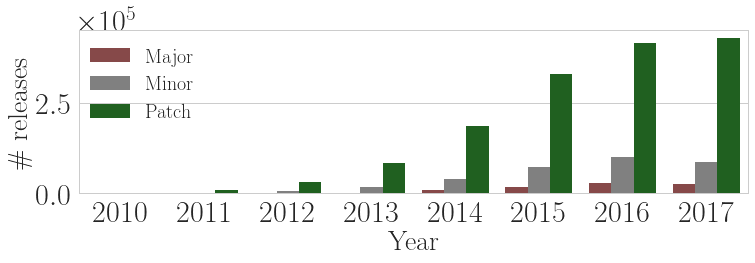

In [127]:
updates=dep.query('release_type!="First release"')
updates['datee']=updates['date'].apply(lambda x: str(x).split('-')[0])
updates['type']=updates['release_type'].apply(lambda x: str(x).split()[0])
a=updates.groupby(['type','datee']).count().reset_index()
a.sort_values(['package'], ascending=False, inplace=True)
#a['package']=a['package'].apply(lambda x: float(x)*100/float(len(updates)))
ax = sns.barplot(x="datee", y="package", hue="type", data=a, hue_order=['Major','Minor','Patch'], palette=['brown','gray','green'], saturation=0.5 )
ax.figure.set_size_inches(12,3)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_xlabel('Year')
ax.set_ylabel('\# releases')
ax.legend( loc='upper right', bbox_to_anchor=(0.2, 1), fontsize=20)#,ncol=3)#, fancybox=True, shadow=True)
ax.figure.savefig('../../seneca_research/ICSR2018/figures/type_of_releases.pdf', bbox_inches='tight', facecolor='white')

In [69]:
updates=tech_lag_calcul.loc[:,['release_type','updated_major','updated_minor','updated_patch']]
updates['updated_major']=updates['updated_major'].apply(float)
updates['updated_minor']=updates['updated_minor'].apply(float)
updates['updated_patch']=updates['updated_patch'].apply(float)
#updates['release_type']=updates['major_release']+';'+updates['minor_release']+';'+updates['patch_release']
#updates=updates.query('updated_major != 0 or updated_minor != 0 or updated_patch != 0')
updates=updates.query('release_type!="first release"')
# updates['time']=updates['release_type'].apply(lambda x: str(x).split(';')[0] if str(x).split(';')[0]!="False"
#                                                      else str(x).split(';')[1] if str(x).split(';')[1]!="False"
#                                                      else str(x).split(';')[2])
updates=updates.loc[:,['updated_major','updated_minor','updated_patch','release_type']]
len(updates)

3581581

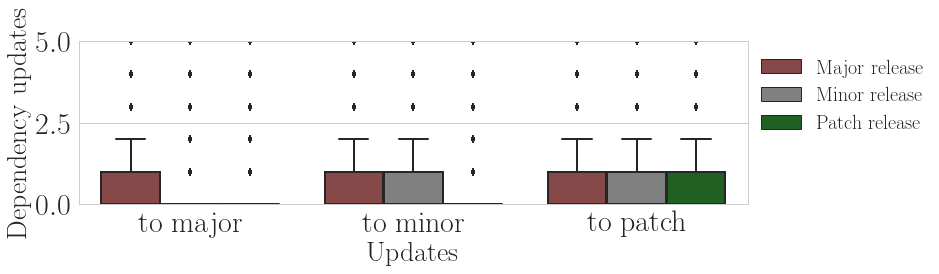

In [80]:
updates2=updates.rename(columns = {'updated_major':'to major','updated_minor':'to minor', 'updated_patch':'to patch'})
updates_2=pd.melt(updates2, id_vars=['release_type'], value_vars=['to major','to minor','to patch'])
updates_2=updates_2.rename(columns = {'variable':'updates'})
ax = sns.boxplot(y="value", x="updates", hue="release_type", data=updates_2, hue_order=['Major release','Minor release','Patch release'], palette=['brown','gray','green','blue'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Dependency updates')
ax.set_xlabel('Updates')
#ax.set_yscale('log')
ax.figure.set_size_inches(12,3)
ax.set_ylim(0,5)
ax.legend( loc='upper right', bbox_to_anchor=(1.29, 1), fontsize=20)#,ncol=3)#, fancybox=True, shadow=True)
ax.figure.savefig('../../seneca_research/ICSR2018/figures/updating.png', bbox_inches='tight', facecolor='white')

In [61]:
updates=tech_lag_calcul.loc[:,['release_type','added','stayed','removed']]
updates['Added']=updates['added'].apply(float)
updates['Unchanged']=updates['stayed'].apply(float)
updates['Removed']=updates['removed'].apply(float)
updates=updates.query('release_type!="first release"')
#updates=updates.query('updated_major != 0 or updated_minor != 0 or updated_patch != 0')
updates=updates.loc[:,['Added','Removed','Unchanged','release_type']]
len(updates)

3581581

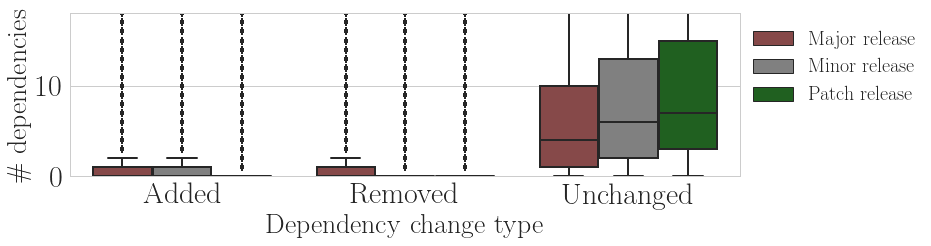

In [63]:
updates_2=pd.melt(updates, id_vars=['release_type'], value_vars=['Added','Removed','Unchanged'])
updates_2=updates_2.rename(columns = {'variable':'deps'})
ax = sns.boxplot(y="value", x="deps", hue="release_type", data=updates_2, hue_order=['Major release','Minor release','Patch release'], palette=['brown','gray','green','blue'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('\# dependencies')
ax.set_xlabel('Dependency change type')
#ax.set_yscale('log')
ax.figure.set_size_inches(12,3)
ax.set_ylim(0,18)
ax.legend( loc='upper right', bbox_to_anchor=(1.29, 1), fontsize=20)#,ncol=3)#, fancybox=True, shadow=True)
ax.figure.savefig('../../seneca_research/ICSR2018/figures/added_removed_stayed_deps.pdf', bbox_inches='tight', facecolor='white')


In [77]:
tech_inverse=tech_lag_calcul.query('updates_inverse>0')
tech_inverse['year']=tech_inverse['date'].apply(lambda x: str(x).split('-')[0])

In [86]:
tech_inverse['version2']=tech_inverse['version'].apply(lambda x: str(x).split('.')[0])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
14561/len(tech_inverse)

0.48772399933009547

In [105]:
t=tech_lag_calcul.query('updates_inverse!="0" or updates!="0"')
len(tech_lag_calcul.query('updates_inverse!="0"'))/len(t)

0.025850185813092463

In [89]:
updates=tech_lag_calcul.loc[:,['release_type','major_release','minor_release','patch_release','date']]
updates=updates.query('release_type!="First release"')
updates['release_type']=updates['major_release']+';'+updates['minor_release']+';'+updates['patch_release']
#updates=updates.query('updated_major != 0 or updated_minor != 0 or updated_patch != 0')
updates['time']=updates['release_type'].apply(lambda x: str(x).split(';')[0] if str(x).split(';')[0]!="False"
                                                     else str(x).split(';')[1] if str(x).split(';')[1]!="False"
                                                     else str(x).split(';')[2])
updates['time before releasing']=updates['time'].apply(float)
updates['release_type']=updates['release_type'].apply(lambda x: 'Major' if str(x).split(';')[0]!="False"
                                                     else 'Minor' if str(x).split(';')[1]!="False"
                                                     else 'Patch')
updates['date']=updates['date'].apply(lambda x : str(x).split('-')[0])
updates=updates.loc[:,['time before releasing','release_type','date']]
#updates['time']=updates['time before releasing'].apply(int)

In [67]:
updates.query('release_type=="major release"').time.describe().apply(lambda x: format(x, 'f'))

count    124887.000000
mean         69.386974
std         150.338367
min           0.000000
25%           1.000000
50%          10.000000
75%          64.000000
max        2359.000000
Name: time, dtype: object

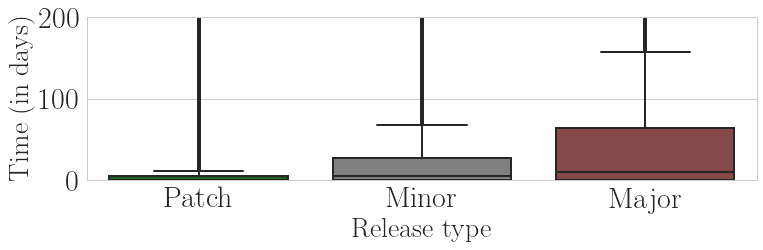

In [91]:
updates_2=updates
#updates_2=updates_2.rename(columns = {'variable':'deps'})
ax = sns.boxplot(y="time before releasing", x="release_type", data=updates_2, order=['Patch','Minor','Major'], palette=['green','gray','brown','blue'], saturation=0.5)#, split=True)#, order=order)    
#ax.set_yscale('log')
ax.figure.set_size_inches(12,3)
ax.set_ylim(0,200)
ax.set_ylabel('Time (in days)')
ax.set_xlabel('Release type')

ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=18,ncol=3, fancybox=True, shadow=True)
ax.figure.savefig('../../seneca_research/ICSR2018/figures/time_before_releasing.pdf', bbox_inches='tight', facecolor='white')


# lag_versions_21-11.csv'

In [6]:
#lag_versions=pd.read_csv('../icsr2018/csv/lag_versions_21-11.csv', sep=';', dtype=object, index_col=None)
lag_versions=pd.read_csv('../icsr2018/csv/lag_versions_01-12.csv', sep=';', dtype=object, index_col=None, error_bad_lines=False)


b'Skipping line 2969316: expected 11 fields, saw 18\n'


In [7]:
lag_versions['date_len']=lag_versions['version_date'].apply(lambda x: len(str(x).split('-')))
lag_versions=lag_versions.query('date_len!=1')
lag_versions['date']=lag_versions['version_date'].apply(lambda x: str(x).split('-')[0])

In [65]:
lag_versions['date']=lag_versions['version_date'].apply(lambda x: str(x).split()[0].split('-')[0])
la_ver=lag_versions.loc[:,['date','major_lag','minor_lag','patch_lag']]
la_ver=la_ver.rename(columns = {'major_lag':'Major','patch_lag':'Patch', 'minor_lag':'Minor'})
la_ver2=pd.melt(la_ver, id_vars=['date'])#, value_vars=['updated to major','updated to minor','updated to patch'])
la_ver2=la_ver2.rename(columns = {'variable':'version type', 'value':'vLag'})
la_ver2['vLag']=la_ver2['vLag'].apply(int)

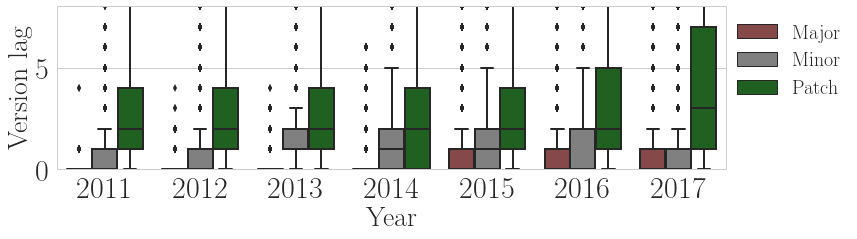

In [10]:
ax = sns.boxplot(y="vLag", x="date", hue="version type", data=la_ver2, order=['2011','2012','2013','2014','2015','2016','2017'], palette=['brown','gray','green','blue'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Version lag')
ax.set_xlabel('Year')
ax.figure.set_size_inches(12,3)
ax.legend( loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=20)#,ncol=3)#, fancybox=True, shadow=True)
ax.set_ylim(0,8)
ax.figure.savefig('../../seneca_research/ICSR2018/figures/vlag_dependency.png', bbox_inches='tight', facecolor='white')

In [70]:
la_ver2[la_ver2['version type']=="Major"].vLag.describe().apply(lambda x: format(x, 'f'))

count    11563053.000000
mean            0.498163
std             0.784274
min             0.000000
25%             0.000000
50%             0.000000
75%             1.000000
max            27.000000
Name: vLag, dtype: object

In [8]:
scipy.stats.normaltest(la_ver2[la_ver2['version type']=="Patch"].query('date=="2017"').vLag)

NormaltestResult(statistic=11805141.029211298, pvalue=0.0)

In [9]:
scipy.stats.mannwhitneyu(la_ver2[la_ver2['version type']=="Patch"].query('date=="2017"').vLag,
                         la_ver2[la_ver2['version type']=="Patch"].query('date=="2014"').vLag,
                        use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=2378047783470.0, pvalue=0.0)

In [78]:
cliffsDelta(la_ver2[la_ver2['version type']=="Patch"].query('date=="2017"').vLag,
                         la_ver2[la_ver2['version type']=="Patch"].query('date=="2011"').vLag)

d=0.18203916101070255 True


True

In [11]:
la_ver=lag_versions.query('package=="eslint"').loc[:,['date','major_lag','minor_lag','patch_lag']]
la_ver=la_ver.rename(columns = {'major_lag':'Major','patch_lag':'Patch', 'minor_lag':'Minor'})
la_ver2=pd.melt(la_ver, id_vars=['date'])#, value_vars=['updated to major','updated to minor','updated to patch'])
la_ver2=la_ver2.rename(columns = {'variable':'version type', 'value':'vLag'})
la_ver2['vLag']=la_ver2['vLag'].apply(int)
la_ver2=la_ver2.sort_values(['date'], ascending=True)

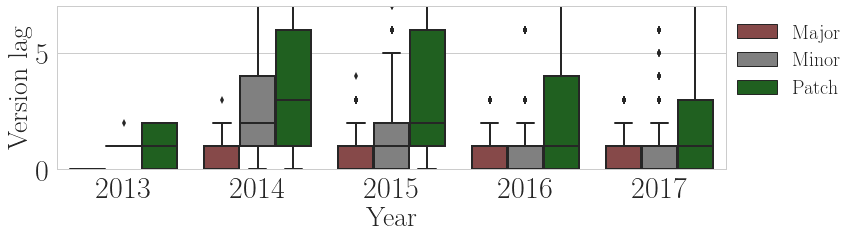

In [13]:
ax = sns.boxplot(y="vLag", x="date", hue="version type", hue_order=['Major','Minor','Patch'], data=la_ver2, palette=['brown','gray','green','blue'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Version lag')
ax.set_xlabel('Year')
ax.figure.set_size_inches(12,3)
ax.legend( loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=20)#,ncol=3)#, fancybox=True, shadow=True)
ax.set_ylim(0,7)
ax.figure.savefig('../../seneca_research/ICSR2018/figures/vlag_dependency_eslint.pdf', bbox_inches='tight', facecolor='white')

In [8]:
versions=pd.read_csv('../icsr2018/csv/NPM-versions.csv', sep=',', dtype=object, index_col=None)

In [28]:

lag_versions['patch_lag']=lag_versions['patch_lag'].apply(int)
lag_versions['minor_lag']=lag_versions['minor_lag'].apply(int)
lag_versions['major_lag']=lag_versions['major_lag'].apply(int)

a=lag_versions.groupby(['package','dependency'])


In [165]:
a=lag_versions.groupby(['package','dependency']).count()
a=a.reset_index().groupby('dependency').count()
b=lag_versions.groupby('dependency').count()

In [166]:
deps_package_out=a.sort_values(['package'], ascending=False).loc[:,['package']]
deps_package_out=deps_package_out.rename(columns = {'package':'outdated_packages'})
deps_versions_out=b.sort_values(['package'], ascending=False).loc[:,['package']]
deps_versions_out=deps_versions_out.rename(columns = {'package':'outdated_versions'})

In [167]:
a=dep_ver.groupby(['package','dependency']).count()
a=a.reset_index().groupby('dependency').count()
b=dep_ver.groupby('dependency').count()

In [168]:
deps_package=a.sort_values(['package'], ascending=False).loc[:,['package']]
deps_package=deps_package.rename(columns = {'package':'used_packages'})
deps_versions=b.sort_values(['package'], ascending=False).loc[:,['package']]
deps_versions=deps_versions.rename(columns = {'package':'used_versions'})


In [ ]:
vers=versions.rename(columns = {'package':'dependency'}).groupby('dependency').count().sort_values(['version'], ascending=False).loc[:,['version']]

In [269]:
deps_out_backup=deps_out

In [282]:
deps_out=pd.concat([deps_package_out, deps_versions_out,deps_package,deps_versions,vers], axis=1)
deps_out['out_of_all_version']=deps_out['outdated_versions']/deps_out['used_versions']
deps_out['out_of_all_package']=deps_out['outdated_packages']/deps_out['used_packages']
deps_out=deps_out.query('version != "NaN" and used_packages != "NaN"')
deps_out['version']=deps_out['version'].apply(int)
deps_out=deps_out.sort_values(['used_packages'], ascending=False)

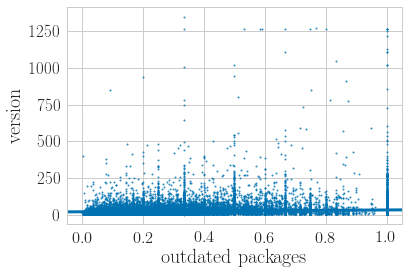

In [153]:
deps_out['outdated packages']=deps_out['out_of_all_package']
ax= sns.regplot(x="outdated packages", y="version", data=deps_out)
#ax=deps_out.plot( s=10, kind="scatter", y='version',x='outdated packages', linewidth=1, color='brown')

In [72]:
# Cliff's Delta
from __future__ import division
 
def cliffsDelta(lst1,lst2,
                dull = [0.147, # small
                        0.33,  # medium
                        0.474 # large
                        ][0] ): 
  "Returns true if there are more than 'dull' differences"
  m, n = len(lst1), len(lst2)
  lst2 = sorted(lst2)
  j = more = less = 0
  for repeats,x in runs(sorted(lst1)):
    while j <= (n - 1) and lst2[j] <  x: 
      j += 1
    more += j*repeats
    while j <= (n - 1) and lst2[j] == x: 
      j += 1
    less += (n - j)*repeats
  d= (more - less) / (m*n)
  f=abs(d)  > dull
  print("d="+str(d)+' '+str(f))
  return abs(d)  > dull
   
def runs(lst):
  "Iterator, chunks repeated values"
  for j,two in enumerate(lst):
    if j == 0:
      one,i = two,0
    if one!=two:
      yield j - i,one
      i = j
    one=two
  yield j - i + 1,two
  
def _cliffsDelta():
  "demo function"
  lst1=[1,2,3,4,5,6,7]
  for r in [1.01,1.1,1.21, 1.5, 2]:
    lst2=map(lambda x: x*r,lst1)
    #return lst2
    print(lst2,cliffsDelta(lst1,lst2)) # should return False

In [42]:
outies=pd.read_csv('../icsr2018/csv/outdated_and_not.csv', sep=';', index_col=None)
#outies=outies.query('used_packages>19')
outies["outdated2"]=outies["outdated2"].apply(lambda x: x.capitalize())
outies=outies.rename(columns ={'versions per year':'Versions per year','version in lifetime':'Versions in lifetime'})
print(len(outies.query('outdated == True')), len(outies.query('outdated == False')))

34897 214762


In [48]:
outies['outdated2']=outies['outdated2'].apply(lambda x: x if x=="Outdated"
                                             else "Up-to-date")

In [43]:
outies['vYear']=outies['Versions per year']
outies['vLife']=outies['Versions in lifetime']
outies.query('outdated==True').vYear.describe().apply(lambda x: format(x, 'f'))

count    34897.000000
mean        15.242536
std         47.481980
min          0.197832
25%          2.678197
50%          5.868167
75%         13.750000
max       1555.858586
Name: vYear, dtype: object

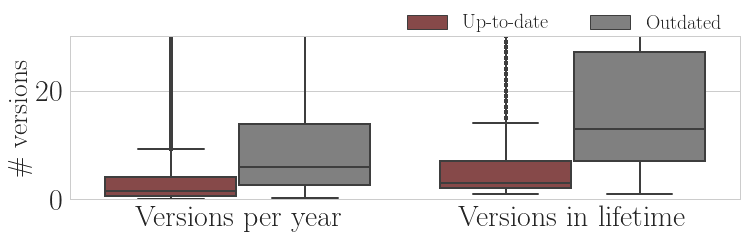

In [55]:
deps_out2_melted=pd.melt(outies, id_vars=['outdated2'], value_vars=['Versions per year','Versions in lifetime'])
ax = sns.boxplot(y="value", x="variable", hue="outdated2", data=deps_out2_melted, palette=['brown','gray','green','blue'], saturation=0.5)#, split=True)#, order=order)
ax.figure.set_size_inches(12,3)
ax.set_ylim(0,30)
ax.set_ylabel('\# versions')
ax.set_xlabel('')
ax.legend( loc='upper right', bbox_to_anchor=(1, 1.24), fontsize=20,ncol=3)#, fancybox=True, shadow=True)
ax.figure.savefig('../../seneca_research/ICSR2018/figures/dependency_outdated_not.pdf', bbox_inches='tight', facecolor='white')

In [25]:
cliffsDelta(outies.query('outdated==True').vLife,outies.query('outdated==False').vLife)

d=0.650112131609569 True


True

In [26]:
cliffsDelta(outies.query('outdated == True').version,outies.query('outdated == False').version)

d=0.650112131609569 True


True

In [426]:
outies['usedp']=outies['used_packages']
outies.sort_values(['usedp'], ascending=False, inplace=True)

In [80]:
tech_lag_calcul2=pd.read_csv('../icsr2018/csv/tech_lag_updates-16-11.csv', sep=';', dtype=object, index_col=None)
len(tech_lag_calcul2)
tech_lag_calcul2['release_type']=tech_lag_calcul2['major_release']+';'+tech_lag_calcul2['minor_release']+';'+tech_lag_calcul2['patch_release']

tech_lag_calcul2['release_type']=tech_lag_calcul2['release_type'].apply(lambda x: 'Major' if str(x).split(';')[0]!="False"
                                                     else 'Minor' if str(x).split(';')[1]!="False"
                                                     else 'Patch' if str(x).split(';')[2]!="False"
                                                     else 'First release')

In [81]:
#tech_lag_calcul2.sort_values(['package','date'], ascending=True, inplace=True)
#tech_lag_calcul2.reset_index(inplace=True)
index_release_type=tech_lag_calcul2.loc[:,['release_type','package']]
index_release_type=index_release_type.rename(columns = {'release_type':'release_type_before','package':'package_before'})

index_release_type.index = index_release_type.index + 1  # shifting index
index_release_type=pd.concat([tech_lag_calcul2, index_release_type], axis=1)

index_release_patch=index_release_type.query('release_type=="Patch"')

index_release_patch=index_release_patch.loc[:,['package','date','patch_release','release_type_before']]
index_release_patch['time']=index_release_patch['patch_release'].apply(int)
index_release_patch['from']=index_release_patch['release_type_before']

In [82]:
index_release_patch[index_release_patch['from']=="First release"].time.describe().apply(lambda x: format(x, 'f'))

count    274431.000000
mean         14.254654
std          64.591441
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max        2077.000000
Name: time, dtype: object

In [90]:
for x in ['Major','Minor', 'Patch', 'First release']:
    for y in ['Major','Minor', 'Patch', 'First release']:
        print(x,' vs ',y,scipy.stats.ranksums(index_release_patch[index_release_patch['from']==x].time,
                             index_release_patch[index_release_patch['from']==y].time))

Major  vs  Major RanksumsResult(statistic=0.0, pvalue=1.0)
Major  vs  Minor RanksumsResult(statistic=6.6959158550185309, pvalue=2.1432502878800871e-11)
Major  vs  Patch RanksumsResult(statistic=42.28464746312185, pvalue=0.0)
Major  vs  First release RanksumsResult(statistic=74.725187371778546, pvalue=0.0)
Minor  vs  Major RanksumsResult(statistic=-6.6959158550185309, pvalue=2.1432502878800871e-11)
Minor  vs  Minor RanksumsResult(statistic=0.0, pvalue=1.0)
Minor  vs  Patch RanksumsResult(statistic=67.622816817689881, pvalue=0.0)
Minor  vs  First release RanksumsResult(statistic=111.12863231825729, pvalue=0.0)
Patch  vs  Major RanksumsResult(statistic=-42.28464746312185, pvalue=0.0)
Patch  vs  Minor RanksumsResult(statistic=-67.622816817689881, pvalue=0.0)
Patch  vs  Patch RanksumsResult(statistic=0.0, pvalue=1.0)
Patch  vs  First release RanksumsResult(statistic=85.39725444745838, pvalue=0.0)
First release  vs  Major RanksumsResult(statistic=-74.725187371778546, pvalue=0.0)
First releas

In [83]:

scipy.stats.ranksums(index_release_patch[index_release_patch['from']=="Minor"].time,
                     index_release_patch[index_release_patch['from']=="Major"].time)

RanksumsResult(statistic=-6.6959158550185309, pvalue=2.1432502878800871e-11)

In [79]:
ax = sns.boxplot(y="time", x="from", data=index_release_patch, palette=['brown','gray','green','blue'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Time (in days)')
ax.set_xlabel('From (release type)')

ax.figure.set_size_inches(12,3)
ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3)#, fancybox=True, shadow=True)
ax.set_ylim(0,20)
#ax.figure.savefig('../../seneca_research/ICSR2018/figures/time_before_patch_release_ALL.png', bbox_inches='tight', facecolor='white')

NameError: name 'index_release_patch' is not defined

In [51]:
pop=dep_ver2.groupby(['dependency','package']).count().loc[:,['dependency_version']]
pop=pop.reset_index().groupby(['dependency']).count().loc[:,['dependency_version']]

In [65]:
#a=pd.concat([index_release_patch.set_index('package'), pop], join='inner', axis=1)
patch_releases=index_release_patch.set_index('package').merge(pop, left_index=True, right_index=True)

In [87]:
#50%            2.000000
patch_releases['popular']=patch_releases['dependency_version'].apply(lambda x: int(x)>2)
patch_releases['popular']=patch_releases['popular'].apply(lambda x: 'popular' if x
                                                         else 'not popular')
print(len(patch_releases.query('popular=="popular"')),len(patch_releases.query('popular!="popular"')))

710817 761316


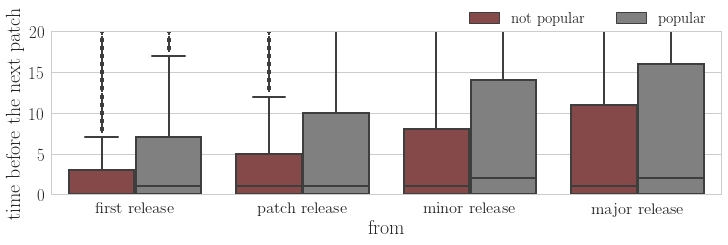

In [89]:
ax = sns.boxplot(y="time", x="from", data=patch_releases, hue='popular', palette=['brown','gray','green','blue'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('time before the next patch')
ax.figure.set_size_inches(12,3)
ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3)#, fancybox=True, shadow=True)
ax.set_ylim(0,20)
ax.figure.savefig('../../seneca_research/ICSR2018/figures/time_before_patch_release.png', bbox_inches='tight', facecolor='white')

In [83]:
lag_versions.query('package=="jasmine" and dependency=="glob"').sort_values(['version_date'], ascending=True)

,package,version_date,dependency,dependency_kind,dependency_constraint,dependency_version,dependency_date,latest_date,major_lag,minor_lag,patch_lag
6186580,jasmine,2014-08-22 20:18:42 UTC,glob,runtime,^3.2.11,3.2.11,2014-05-20 23:31:42 UTC,2014-07-28 21:30:10 UTC,1,0,5
6186588,jasmine,2014-11-14 21:06:52 UTC,glob,runtime,^3.2.11,3.2.11,2014-05-20 23:31:42 UTC,2014-09-17 19:24:29 UTC,1,0,6
6186593,jasmine,2014-12-01 21:16:57 UTC,glob,runtime,^3.2.11,3.2.11,2014-05-20 23:31:42 UTC,2014-12-01 16:32:56 UTC,1,3,16
6186587,jasmine,2015-02-02 20:09:36 UTC,glob,runtime,^3.2.11,3.2.11,2014-05-20 23:31:42 UTC,2015-01-15 17:58:01 UTC,1,3,20
6186579,jasmine,2015-02-06 23:20:14 UTC,glob,runtime,^3.2.11,3.2.11,2014-05-20 23:31:42 UTC,2015-01-15 17:58:01 UTC,1,3,20
6186595,jasmine,2015-04-28 20:57:26 UTC,glob,runtime,^3.2.11,3.2.11,2014-05-20 23:31:42 UTC,2015-04-09 22:29:39 UTC,8,5,24
6186536,jasmine,2015-05-02 01:42:08 UTC,glob,runtime,^3.2.11,3.2.11,2014-05-20 23:31:42 UTC,2015-04-09 22:29:39 UTC,8,5,24
6186582,jasmine,2015-08-03 23:30:20 UTC,glob,runtime,^3.2.11,3.2.11,2014-05-20 23:31:42 UTC,2015-07-15 01:34:57 UTC,8,5,32
6186599,jasmine,2015-12-03 06:25:19 UTC,glob,runtime,^3.2.11,3.2.11,2014-05-20 23:31:42 UTC,2015-11-11 19:47:23 UTC,9,5,33
6186503,jasmine,2015-12-03 22:29:52 UTC,glob,runtime,^3.2.11,3.2.11,2014-05-20 23:31:42 UTC,2015-11-11 19:47:23 UTC,9,5,33


In [58]:
lag_eslint=lag_versions.query('package=="eslint"')
lag_eslint2=lag_eslint.loc[:,['version_date','patch_lag','minor_lag','major_lag']]
lag_eslint2['patch_lag']=lag_eslint2['patch_lag'].apply(int)
lag_eslint2['minor_lag']=lag_eslint2['minor_lag'].apply(int)
lag_eslint2['major_lag']=lag_eslint2['major_lag'].apply(int)

lag_eslint3=lag_eslint2.groupby(by=['version_date']).sum().groupby(level=[0]).cumsum().reset_index()

lag_eslint3['date']=lag_eslint3['version_date'].apply(lambda x: str(x).split()[0].split('-')[0])
la_ver=lag_eslint3.loc[:,['date','major_lag','minor_lag','patch_lag']]
la_ver=la_ver.rename(columns = {'major_lag':'major','patch_lag':'patch', 'minor_lag':'minor'})
la_ver2=pd.melt(la_ver, id_vars=['date'])#, value_vars=['updated to major','updated to minor','updated to patch'])
la_ver2=la_ver2.rename(columns = {'variable':'version type', 'value':'vLag'})
la_ver2['vLag']=la_ver2['vLag'].apply(int)

In [13]:
lag_group=lag_versions.groupby(['package','version_date']).count().sort_values(['dependency'], ascending=False)

In [62]:
la_ver2['version_type']=la_ver2['version type'].apply(lambda x: x.capitalize())

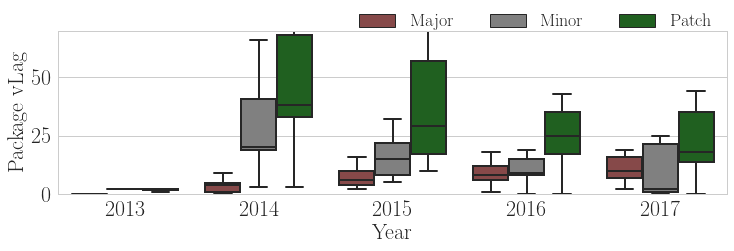

In [71]:
ax = sns.boxplot(y="vLag", x="date", hue="version_type", data=la_ver2, order=['2013','2014','2015','2016','2017'], palette=['brown','gray','green','blue'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Package vLag')
ax.set_xlabel('Year')
ax.figure.set_size_inches(12,3)
ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=18,ncol=3)#, fancybox=True, shadow=True)
ax.set_ylim(0,70)
ax.figure.savefig('../../seneca_research/ICSR2018/figures/vlag_package_eslint.pdf', bbox_inches='tight', facecolor='white')

In [15]:
s=pd.concat([versions.set_index(['package','version']), versions_orig.set_index(['package','version'])], axis=1)
s['version_date']=s['date']

In [18]:
s.head()

,,version_type,version_date,date
package,version,,,
0,0.0.0,first_release,2014-04-01 22:51:11 UTC,2014-04-01 22:51:11 UTC
0-,0.0.1,first_release,2017-03-06 11:57:07 UTC,2017-03-06 11:57:07 UTC
0----,1.0.0,first_release,2017-10-29 23:55:34 UTC,2017-10-29 23:55:34 UTC
0-0,1.0.2,first_release,2016-12-04 05:52:10 UTC,2016-12-04 05:52:10 UTC
0-9,0.0.1,first_release,2017-03-06 12:31:57 UTC,2017-03-06 12:31:57 UTC


In [13]:
lag_versions.head()

,package,version_date,dependency,dependency_kind,dependency_constraint,dependency_version,dependency_date,latest_date,major_lag,minor_lag,patch_lag
0,@~lisfan/logger,2017-10-20 07:14:23 UTC,@~lisfan/validation,runtime,^1.0.0-rc.8,1.0.0-rc.8,2017-10-20 07:12:51 UTC,2017-10-20 07:14:06 UTC,0,0,1
1,@~lisfan/logger,2017-10-20 07:12:13 UTC,@~lisfan/validation,runtime,^1.0.0-rc.1,1.0.0-rc.1,2017-10-19 03:26:36 UTC,2017-10-20 05:34:28 UTC,0,0,3
2,@~lisfan/logger,2017-10-19 03:35:28 UTC,@~lisfan/validation,runtime,^1.0.0-rc.0,1.0.0-rc.0,2017-10-18 12:42:15 UTC,2017-10-19 03:26:36 UTC,0,0,1
3,@zombiec0rn/zombie-swarm-cli,2016-10-07 08:42:03 UTC,@zombiec0rn/zombie-scheduler,runtime,2.0.0,2.0.0,2016-03-20 19:59:14 UTC,2016-03-21 08:45:50 UTC,0,1,0
4,@zombiec0rn/zombie-swarm-cli,2016-10-11 11:53:22 UTC,@zombiec0rn/zombie-scheduler,runtime,2.0.0,2.0.0,2016-03-20 19:59:14 UTC,2016-03-21 08:45:50 UTC,0,1,0


In [22]:
#test_=lag_versions.set_index(['package','version_date']).merge(s.set_index(['package','version_date']), left_index=True, right_index=True)